# Objectives
* train a conv net on the MNIST dataset 
* Introduce the main building blocks pooling and con layers

In [ ]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# nn.Conv2d


* in_channels (int) – Number of channels in the input image


* out_channels (int) – Number of channels produced by the convolution

* kernel_size (int or tuple) – Size of the convolving kernel

* stride (int or tuple, optional) – Stride of the convolution. Default: 1

* padding (int, tuple or str, optional) – Padding added to all four sides of the input. Default: 0

* padding_mode (str, optional) – 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'

* dilation (int or tuple, optional) – Spacing between kernel elements. Default: 1

* groups (int, optional) – Number of blocked connections from input channels to output channels. Default: 1

* bias (bool, optional) – If True, adds a learnable bias to the output. Default: True

In [ ]:
# For images in Pytorch the convention to store data is always : ( #batch_size , # number_of_channels ​, #heigh_of_image ,#width_of_image) 


# lets create a random tensor that represents a dataset

in_channels_ = 16


input = torch.randn(10, in_channels_, 100, 100)

# the way to read the above : we have 10 images, each one of them is a tensor of width and height = 100 and has 16 channels.


m = nn.Conv2d(in_channels = in_channels_, out_channels=  33, kernel_size=(3,3))


output = m(input)


print(output.shape)

# output has the same shape: there are 10 images output, each one of them is a tensor of width and height 98 and has 33 channels.






torch.Size([10, 33, 98, 98])


Observe that the kernel size affects the size of the output: the larger the kernel size the smaller the width and height of the tensor

In [ ]:
in_channels_ = 16

input = torch.randn(10, in_channels_, 100, 100)

# the way to read the above : we have 10 images, each one of them is a tensor of width and height = 100 and has 16 channels.


m = nn.Conv2d(in_channels = in_channels_, out_channels=  33, kernel_size=(5,5)) 


output = m(input)


print(output.shape) 

torch.Size([10, 33, 96, 96])


Padding "pads" parts to the border of the image to prevent the size from being changed 

In [ ]:
in_channels_ = 16

input = torch.randn(10, in_channels_, 100, 100)

# the way to read the above : we have 10 images, each one of them is a tensor of width and height = 100 and has 16 channels.


m = nn.Conv2d(in_channels = in_channels_, out_channels=  33, kernel_size=(5,5),padding=2) # pad twp pixels at each side


output = m(input)


print(output.shape) # size is the same as input!

torch.Size([10, 33, 100, 100])


# Pooling


Pooling is a technique commonly used in deep learning for down-sampling feature maps. It helps reduce the spatial dimensions of the feature maps, while retaining the most important information.

In PyTorch, the Pool2d module performs 2D max pooling operation on a given input tensor. The size of the pooling kernel and stride can be specified as arguments.

Here's an example of using Pool2d with a size change:

In [ ]:
import torch.nn as nn

# Define a 2D convolutional neural network layer
conv_layer = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3)

# Define a 2D max pooling layer with size change
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2)

# Define an example input tensor
x = torch.randn(1, 3, 32, 32)  # batch_size=1, channels=3, height=32, width=32

# Pass the input tensor through the convolutional layer
conv_out = conv_layer(x)


print("size after conv layer",conv_out.shape )

# Pass the convolutional output through the pooling layer
pooled_out = pool_layer(conv_out)

# The size of the output tensor after the pooling layer is reduced by a factor of 2 in both dimensions
print("size after pooling layer",pooled_out.size())  # Output: torch.Size([1, 16, 15, 15])

size after conv layer torch.Size([1, 16, 30, 30])
size after pooling layer torch.Size([1, 16, 15, 15])


In the example above, we define a convolutional layer with 3 input channels, 16 output channels, and a kernel size of 3. We then define a max pooling layer with a kernel size of 2 and stride of 2, which reduces the size of the feature maps by a factor of 2 in both dimensions. Finally, we pass an example input tensor through the convolutional layer, followed by the pooling layer, and print the size of the output tensor.

# More Pooling examples


In [ ]:
# pool of square window
m = nn.MaxPool2d((3, 3), stride=(1, 1),padding=1) 
input = torch.randn(1, 16, 100, 100)
output = m(input)
output.shape # observe the output dimension W and H have the same size

torch.Size([1, 16, 100, 100])

In this example, we are creating a 2D max pooling layer using nn.MaxPool2d() from the PyTorch nn module. The pooling layer is specified to use a square window of size (3, 3) and a stride of (1, 1). Additionally, the padding is set to 1 on both sides of the input tensor.

Next, we create an example input tensor with a batch size of 1, 16 input channels, and a spatial dimension of 100 x 100.

We then pass this input tensor through the pooling layer by calling m(input). The max pooling operation will compute the maximum value within each (3, 3) window of the input tensor, sliding the window over the input tensor with a stride of (1, 1). The padding of 1 on both sides ensures that the output tensor has the same spatial dimensions as the input tensor.

Finally, we print the shape of the output tensor using output.shape. Since the pooling layer has reduced the spatial dimensions of the input tensor by (3-1) + 2*1 = 3 in both dimensions due to the padding, and since we are using a stride of (1, 1), the output tensor has the same spatial dimensions as the input tensor: 100 x 100. However, the number of output channels has been reduced to 16 since we are using a max pooling layer. So the output shape is (1, 16, 100, 100).


In [ ]:
# pool of square window
m = nn.MaxPool2d((3, 3), stride=(2, 2),padding=1) 
input = torch.randn(1, 16, 100, 100)
output = m(input)
output.shape  # observe the output dimension W and H have half of the size

torch.Size([1, 16, 50, 50])

# How do you compute the size

The formula for computing the output size of a 2D pooling operation given an input tensor of size (N, C, H, W) and pooling window of size (kH, kW) with stride (sH, sW) and padding (pH, pW) can be given as:


output_height = floor((H + 2*pH - kH) / sH) + 1
output_width = floor((W + 2*pW - kW) / sW) + 1



Here, floor() is the floor function that rounds down to the nearest integer. The term (H + 2*pH - kH) computes the spatial size of the output tensor after applying the pooling operation along the height dimension. Similarly, (W + 2*pW - kW) computes the spatial size of the output tensor after applying the pooling operation along the width dimension. Finally, we add 1 to the result of each division to obtain the output size.

Note that if the pooling operation does not result in an integer output size, then the input size needs to be padded with additional elements to ensure that the output size is an integer. This is often done by setting the padding values (pH, pW) accordingly.

It's important to keep in mind that different pooling operations may have different output sizes, even when applied to the same input tensor with the same pooling window, stride, and padding. For example, a max pooling operation only selects the maximum value within the pooling window, while an average pooling operation computes the average of all the values within the pooling window. This can lead to different output sizes for different pooling operations.

# Example of computing the size in a pooling 

Suppose we have an input tensor x of size (1, 3, 32, 32) and a max pooling layer with a pooling window of size (2, 2), a stride of (2, 2), and (1,1) padding. To compute the output size, we can use the formula:



**output_height = floor((H +2pH - kH) / sH) + 1**

**output_width = floor((W  +2pH - kW) / sW) + 1 **



where H and W are the height and width of the input tensor, and kH and kW are the height and width of the pooling window. In this case, we have H = 32, W = 32, kH = 2, kW = 2, sH = 2, and sW = 2, so we can substitute these values into the formula:


**output_height = floor((32 +2 - 2) / 2) + 1 = 17**

**output_width = floor((32 +2 - 2) / 2) + 1 = 17**



Therefore, the output size of the max pooling operation is (1, 3, 17, 17).

## Things to do

As an exercise, you could try computing the output size of a max pooling operation with a different set of parameters. For example, given an input tensor x of size (1, 3, 28, 28) and a max pooling layer with a pooling window of size (3, 3), a stride of (2, 2), and padding of (1, 1), you could try to compute the output size using the formula provided earlier. This exercise will help you better understand how the output size of a pooling operation is affected by different parameters.

In [ ]:

# Define an example input tensor
x = torch.randn(1, 3, 32, 32)  # batch_size=1, channels=3, height=32, width=32


# Define a 2D max pooling layer with size change
pool_layer = nn.MaxPool2d(kernel_size=2, stride=2,padding=1)

# Pass the convolutional output through the pooling layer
pooled_out = pool_layer(x)

print("size after pooling layer",pooled_out.size())  # Output: torch.Size([1, 16, 15, 15])

size after pooling layer torch.Size([1, 3, 17, 17])


# Create a network similar to AlexNet

In [ ]:
# load the libraries we will need :

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable




# Load the MNIST dataset

The MNIST dataset is a large database of handwritten digits used for training and testing various image processing systems. It consists of 70,000 grayscale images of size 28 x 28 pixels, each representing a handwritten digit between 0 and 9. The dataset is divided into a training set of 60,000 images and a test set of 10,000 images, which are commonly used to evaluate the performance of machine learning models for image classification tasks. The MNIST dataset has been widely used in research and has become a standard benchmark for image classification algorithms.

In [ ]:
batch_size = 50
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True)


test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.ToTensor()),
    batch_size=1000)




100%|██████████| 9912422/9912422 [00:00<00:00, 92895615.14it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 21159073.16it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26337824.84it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10292019.86it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()
        # input is 28x28
        # padding=2 for same padding
        self.conv1 = nn.Conv2d(1, 32, 5, padding=2)
        # feature map size is 14*14 by pooling
        # padding=2 for same padding
        self.conv2 = nn.Conv2d(32, 64, 5, padding=2)
        # feature map size is 7*7 by pooling
        self.fc1 = nn.Linear(64*7*7, 1024)
        self.fc2 = nn.Linear(1024, 10)
        
    def forward(self, x):
        x = self.conv1(x) 
        x = F.relu(x)
        x = F.max_pool2d(x, 2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)

        x = x.view(-1, 64*7*7)   # reshape Variable
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    


#Remark : 
In general the constructor of an nn.Module contains *trainable* layers which means they have parameters that will be optimized during the backprob algorithm. Observe that in the previous example we declared **nn.Conv2d** inside the init function because it has a trainable component but we did not delacare  **max_pool2d, F.relu, F.dropout** inside the same constructor.


In a general sense, we can consider the torch.nn layers as having trainable parameters, while torch.nn.functional functions are solely functional in nature. The forward() method defines how we compute the output using the provided **layers and functions**. It is acceptable to include tensor printing within the forward pass for convenient debugging, especially when working with intricate models. It's important to note that the forward pass can utilize various elements such as member variables, the data itself, or even multiple arguments to determine the execution computation.

# Prep for training

With the imports in place we can go ahead and prepare the data we'll be using. But before that we'll define the hyperparameters we'll be using for the experiment. Here the number of epochs defines how many times we'll loop over the complete training dataset, while learning_rate and momentum are hyperparameters for the optimizer we'll be using later on.

```
# This is formatted as code
```



In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

# Some terms  

**Iteration**: each time you update model weights

**Batch**: a subset of data used in an iteration

**Epoch**: the number of iterations to look at all n
 observations (people sometimes also say a “full pass through the dataset”)


In [ ]:
network = MnistModel()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

# The training loop



Let's proceed to construct our training loop. Initially, we ensure that our network is in training mode. Then, for each epoch, we iterate through all the training data. The DataLoader takes care of loading the individual batches. Firstly, we manually reset the gradients to zero using optimizer.zero_grad() because PyTorch accumulates gradients by default. Next, we obtain the output of our network (forward pass) and calculate the negative log-likelihood loss between the output and the ground truth label. By invoking the backward() function, we gather a fresh set of gradients, which we subsequently propagate back into each parameter of the network using optimizer.step(). If you're interested in gaining a more comprehensive understanding of PyTorch's automatic gradient system, I highly recommend referring to the official documentation for autograd.

We will monitor the progress by printing out information during the training process. To generate a smooth training curve later on, we create two lists to store the training and testing losses. For the x-axis of the curve, we aim to display the number of training examples the network has processed during training.






In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [ ]:

def train(epoch):
  network.train()  # Set the network to training mode
  for batch_idx, (data, target) in enumerate(train_loader):  # Iterate over batches in the training data
    optimizer.zero_grad()  # Reset gradients to zero
    output = network(data)  # Forward pass to obtain network output
    loss = F.nll_loss(output, target)  # Compute the negative log-likelihood loss
    loss.backward()  # Backpropagate to calculate gradients
    optimizer.step()  # Update network parameters using optimizer
    if batch_idx % log_interval == 0:  # Print and log training progress at specified intervals
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())  # Log the training loss
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))  # Log the training step count
      

In [ ]:
def test():
  network.eval()  # Set the network to evaluation mode
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:  # Iterate over batches in the test data
      output = network(data)  # Forward pass to obtain network output
      test_loss += F.nll_loss(output, target, size_average=False).item()  # Compute the test loss
      pred = output.data.max(1, keepdim=True)[1]  # Get the predicted labels
      correct += pred.eq(target.data.view_as(pred)).sum()  # Count the number of correct predictions
  test_loss /= len(test_loader.dataset)  # Compute the average test loss
  test_losses.append(test_loss)  # Log the test loss
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))  # Print the average test loss and accuracy


In [ ]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

<ipython-input-15-266f9f53284e>:27: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Avg. loss: 2.3000, Accuracy: 1131/10000 (11%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.295619
Train Epoch: 1 [500/60000 (1%)]	Loss: 2.285803
Train Epoch: 1 [1000/60000 (2%)]	Loss: 2.287543
Train Epoch: 1 [1500/60000 (2%)]	Loss: 2.258172
Train Epoch: 1 [2000/60000 (3%)]	Loss: 2.224676
Train Epoch: 1 [2500/60000 (4%)]	Loss: 2.202688
Train Epoch: 1 [3000/60000 (5%)]	Loss: 2.197871
Train Epoch: 1 [3500/60000 (6%)]	Loss: 2.140297
Train Epoch: 1 [4000/60000 (7%)]	Loss: 2.095403
Train Epoch: 1 [4500/60000 (8%)]	Loss: 2.005866
Train Epoch: 1 [5000/60000 (8%)]	Loss: 1.834223
Train Epoch: 1 [5500/60000 (9%)]	Loss: 1.652802
Train Epoch: 1 [6000/60000 (10%)]	Loss: 1.378147
Train Epoch: 1 [6500/60000 (11%)]	Loss: 1.124001
Train Epoch: 1 [7000/60000 (12%)]	Loss: 0.982802
Train Epoch: 1 [7500/60000 (12%)]	Loss: 0.987219
Train Epoch: 1 [8000/60000 (13%)]	Loss: 0.781626
Train Epoch: 1 [8500/60000 (14%)]	Loss: 0.729633
Train Epoch: 1 [9000/60000 (15%)]	Loss: 0.731051
Train Epoch: 1 [9500/60000 

# Evaluate the model 

And there you have it. After merely 3 epochs of training, we have accomplished an impressive 97% accuracy on the test set. It's worth noting that at the beginning, when the parameters were randomly initialized, we achieved approximately 10% accuracy on the test set, which is exactly what we anticipated before initiating the training process.






Text(0, 0.5, 'negative log likelihood loss')

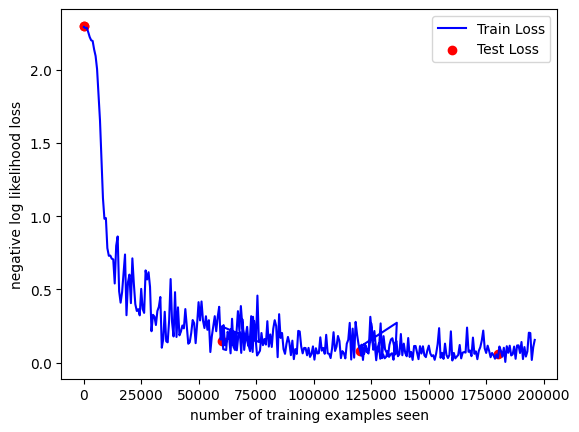

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter([0]+test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')


5